In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math, warnings
from sklearn import linear_model, naive_bayes, svm, model_selection
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import seaborn as sn
from sklearn.metrics import classification_report

In [3]:
df_train = pd.read_csv("dataWorkstyle-training.csv") 
df_test = pd.read_csv("dataWorkstyle-test.csv") 

In [4]:
X = df_train[['sector','investmentStart','returnTime','workStyle','companySize','faturamentoMedio','capitalInstalacao','taxaFranquia','capital_needed','prazo']]
y = df_train['company'] 

In [5]:
X_norm =(X-X.mean())/X.std()

In [6]:
model = linear_model.LogisticRegression(solver = 'lbfgs').fit(X_norm, y)
result = model.score(X_norm, y)

In [7]:
X_test = df_test[['sector','investmentStart','returnTime','workStyle','companySize','faturamentoMedio','capitalInstalacao','taxaFranquia','capital_needed','prazo']]
X_test_norm =(X_test-X_test.mean())/X_test.std()

In [8]:
y_test = model.predict(X_test_norm)
valid_x_df = pd.DataFrame(X_test_norm)
valid_y_df = pd.DataFrame(y_test)


In [9]:
n=5

probas = model.predict_proba(X_test_norm)


top_n_predictions = np.argsort(probas, axis = 1)[:,-n:]

top_class = model.classes_[top_n_predictions]

top_class_df = pd.DataFrame(data=top_class)
results = pd.merge(valid_y_df, valid_x_df, left_index=True, right_index=True)
results = pd.merge(results, top_class_df, left_index=True, right_index=True)



In [12]:
top_class

array([['bibi', 'bobs', 'babbo giovanni', 'chiquinho sorvetes',
        'billy the grill'],
       ['billy the grill', 'bobs', 'babbo giovanni', 'american cookies',
        'acai da barra'],
       ['arezzo  co', 'am pm', 'billy the grill', 'babbo giovanni',
        'casa do construtor'],
       ['billy the grill', 'franquia aramis mensawear',
        'chiquinho sorvetes', 'biomundo', 'anjos colchoes'],
       ['grupo acolher  cuidar', 'af credito solucoes financeiras',
        'bidon corretora de seguros', 'atitude point',
        'colchoes ortobom'],
       ['acai da barra', 'brazil health', 'conta4u', 'bioflora',
        'clube turismo'],
       ['beetools the language school', 'am pm', 'agxt',
        'campinas celulares', 'acium'],
       ['dumond', 'casa do construtor', 'billy the grill',
        'babbo giovanni', 'bibi'],
       ['bibi', 'casa do construtor', 'bobs', 'dumond', 'bluefit'],
       ['brazil health', 'ceopag', 'conta4u', 'clube turismo',
        'bioflora'],
       

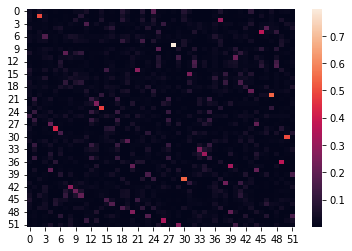

In [11]:
plot = sn.heatmap(probas, annot=False, fmt=".2f")